# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

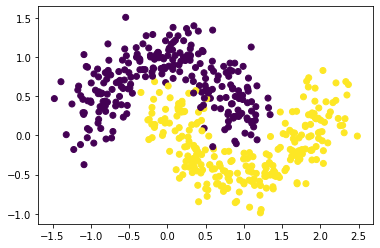

In [6]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

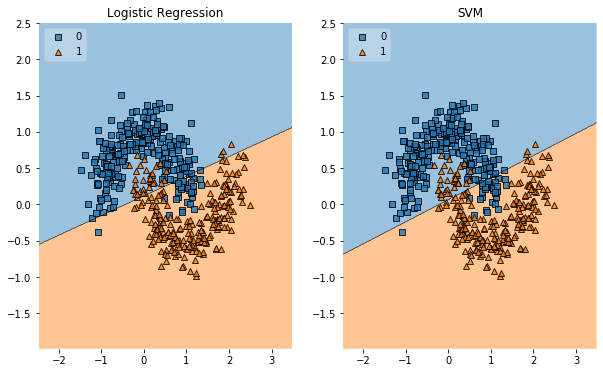

Logistic regression f1 score =  0.8574902519100986
SVM f1 score =  0.8510974842767295


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', C=10) # add some params
svm = SVC(kernel='linear', C=10) # here too

### YOUR CODE HERE

gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10, 6))

labels = ['Logistic Regression', 'SVM']

for clf, lab, grd in zip([lr, svm], labels, [(0, 0), (0, 1)]):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(moons_points, moons_labels, clf=clf, legend=2)
    plt.title(lab)

plt.show()

print('Logistic regression f1 score = ', cross_val_score(lr, moons_points, moons_labels, scoring='f1').mean())
print('SVM f1 score = ', cross_val_score(svm, moons_points, moons_labels, scoring='f1').mean())

**_Both SVM and logistic regression have quite good metrics ~ 85%. But there's clearly seen that the models don't show the main tendency of the dataset._**

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [109]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.1, 1, 5, 10],
         'degree' : np.arange(2,8,1),
         'gamma' : ['auto', 'scale']}

cv_poly = GridSearchCV(SVC(kernel='poly'), params, scoring='f1').fit(moons_points, moons_labels)
cv_rbf = GridSearchCV(SVC(kernel='rbf'), params, scoring='f1').fit(moons_points, moons_labels)
cv_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), params, scoring='f1').fit(moons_points, moons_labels)

svm_poly = cv_poly.best_estimator_
svm_rbf = cv_rbf.best_estimator_
svm_sigmoid = cv_sigmoid.best_estimator_

print('Optimal parameters for polynomial kernel: C = {}, degree = {}, gamma = {}'
      .format(cv_poly.best_params_['C'], cv_poly.best_params_['degree'], cv_poly.best_params_['gamma']))
print('Optimal parameters for rbf kernel: C = {}, gamma = {}'
      .format(cv_rbf.best_params_['C'], cv_rbf.best_params_['gamma']))
print('Optimal parameters for sigmoid kernel: C = {}, gamma = {}'
      .format(cv_sigmoid.best_params_['C'], cv_sigmoid.best_params_['gamma']))

Optimal parameters for polynomial kernel: C = 1, degree = 3, gamma = scale
Optimal parameters for rbf kernel: C = 1, gamma = scale
Optimal parameters for sigmoid kernel: C = 0.1, gamma = auto


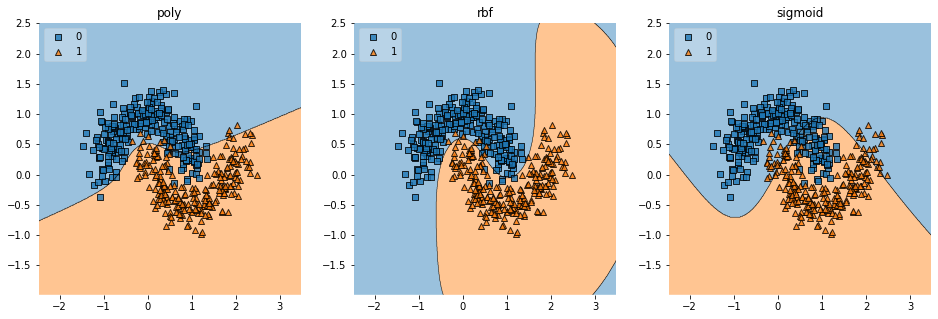

In [147]:
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16,5))

labels = ['poly', 'rbf', 'sigmoid']

for clf, lab, grd in zip([svm_poly, svm_rbf, svm_sigmoid], labels, [(0, 0), (0, 1), (0,2)]):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(moons_points, moons_labels, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [111]:
print('Polynomail kernel f1 = ', cross_val_score(svm_poly, moons_points, moons_labels, scoring='f1').mean())
print('Rbf kernel f1 = ', cross_val_score(svm_rbf, moons_points, moons_labels, scoring='f1').mean())
print('Sigmoid kernel f1 = ', cross_val_score(svm_sigmoid, moons_points, moons_labels, scoring='f1').mean())

Polynomail kernel f1 =  0.9052809268315484
Rbf kernel f1 =  0.9759179917991799
Sigmoid kernel f1 =  0.7822893970573409


**_In comparsion with the linear kernel, f1 score increased significantly (excluding sigmoid kernel). However, polynomial kernel doesn't fit the data perfectly, rbf a little bit overfitted, and sigmoid doesn't show right classification at all. For polymomial kernel I've chosen degree = 3 according to cross validation._**

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

degree = 2 f1 score = 0.8480000000000001
degree = 3 f1 score = 0.976
degree = 4 f1 score = 0.976
degree = 5 f1 score = 0.974
degree = 6 f1 score = 0.9800000000000001
degree = 7 f1 score = 0.978


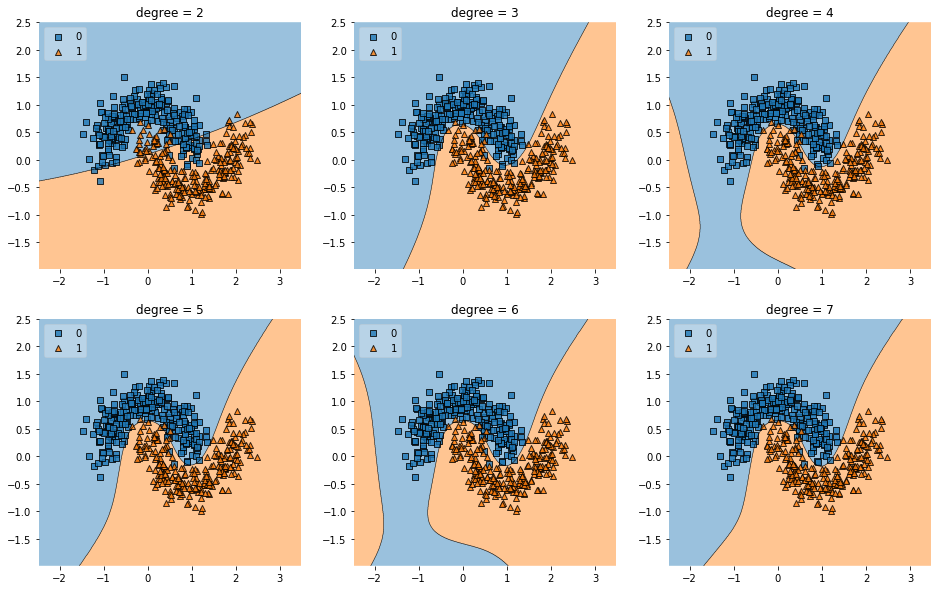

In [155]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### YOUR CODE HERE

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(16,10))

labels = ['degree = 2', 'degree = 3', 'degree = 4', 'degree = 5', 'degree = 6', 'degree = 7']

for deg, lab, grd in zip(range(2,8), labels, itertools.product([0, 1], [0, 1, 2])):
    poly_pipe = make_pipeline(PolynomialFeatures(degree=deg), lr)
    poly_pipe.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(moons_points, moons_labels, clf=poly_pipe, legend=2)
    plt.title(lab)
    print('degree = {} f1 score = {}'.format(deg, cross_val_score(poly_pipe, moons_points, moons_labels).mean()))

plt.show()

**_Even numbers of degrees find some false borders. Odd numbers of degrees starting at 3 fit the data perfectly. The optimal number of degrees is 3. Because starting at 3 the metrics of this method is higher than in SVM with rbf kernel!_**

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

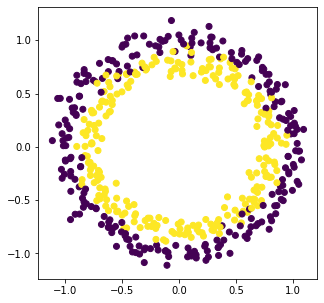

In [156]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

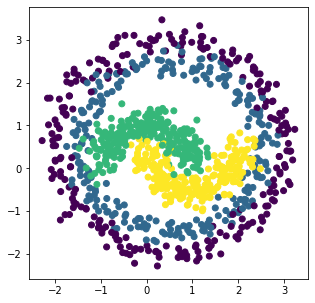

In [174]:
moon_points2 = np.vstack((circles_points*2.5 + 0.5, moons_points))
moon_labels2 = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=moon_labels2)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

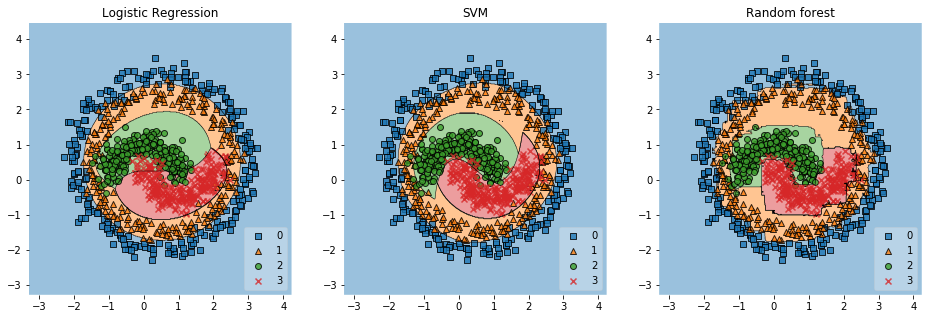

In [234]:
### YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

svm_rbf2 = SVC(kernel='rbf', C=10, gamma='scale')
lr2 = LogisticRegression(C=1, penalty='l1', tol=1e-3, max_iter=1000, solver='saga')
poly_pipe2 = make_pipeline(PolynomialFeatures(degree=3), lr2)
rand_for = RandomForestClassifier(max_depth=10)

gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16,5))

labels = ['Logistic Regression', 'SVM', 'Random forest']

for clf, lab, grd in zip([poly_pipe2, svm_rbf2, rand_for], labels, itertools.product([0], [0,1,2])):
    clf.fit(moon_points2, moon_labels2)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(moon_points2, moon_labels2, clf=clf, legend=4)
    plt.title(lab)

plt.show()


In [235]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
f1 = make_scorer(f1_score, average='macro')
print('Logistic regression f1 score = ', cross_val_score(poly_pipe2, moon_points2, moon_labels2, scoring=f1).mean())
print('SVM f1 score = ', cross_val_score(svm_rbf2, moon_points2, moon_labels2, scoring=f1).mean())
print('Random forest f1 score = ', cross_val_score(rand_for, moon_points2, moon_labels2, scoring=f1).mean())

Logistic regression f1 score =  0.8909426524847486
SVM f1 score =  0.9299652244952789
Random forest f1 score =  0.9118588010057532


**_To sum up, for this dataset SVM with rbf kernel gives the best classification score ~93%. I've also tried random forest ensemble, which shows good results too._**